### Question 3: Conditon and grade effect on price?


Seeing that age alone was not a great indicator of price. Let's examine age's relationship to home conditon and grade. Is the condition or grade of a home a good indicator of price?

Ranking data for 'Condition' and 'Grade' features was provided by King County appraisers website.



In [1]:
import folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import numpy as np

In [13]:
df = pd.read_csv("../data/kc_house_data_cleaned.csv").drop('Unnamed: 0', axis=1)
zips_df = pd.read_csv("../data/zipcode_averages.csv")

### Condition

How good the condition is ( Overall )

    1 = Poor- Worn out
    2 = Fair- Badly worn
    3 = Average
    4 = Good
    5 = Very Good

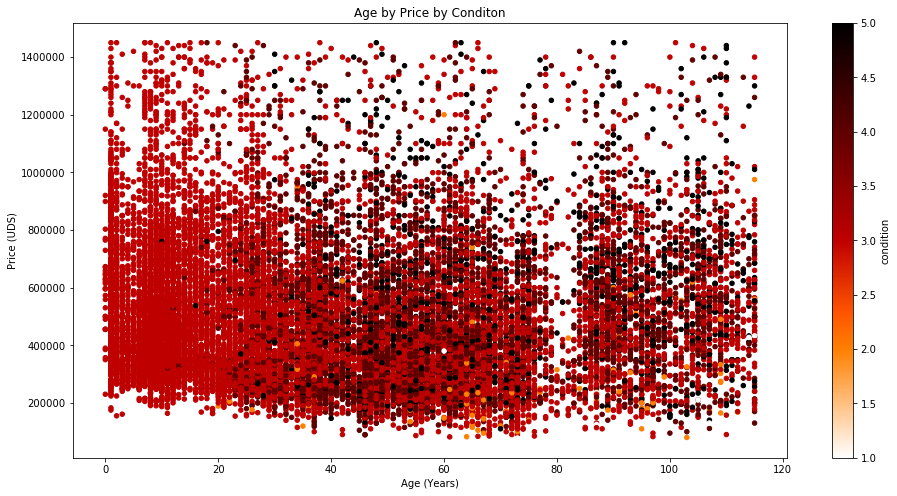

In [4]:
df.plot(kind="scatter", x="age", y="price", figsize=(16, 8), c="condition", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.title('Age by Price by Conditon')
plt.ylabel('Price (UDS)')
plt.xlabel('Age (Years)')
plt.show()

Though subtle, a gradient is showing the older homes in this dataset are often well maintained and continue with condition rankings of above average. The newer homes (20 years old or newer) surprisingly show majority just average ratings. This could be due to many factors not observable in this data: such as newer, faster construction that may be less durable quality. Or perhaps people with older homes may place greater value on maintaining the historical properties of the home, thus maintaining greater condition value for longer. As far as conditions effect on price, there is an sporadic distribution of condition and price. Condition combined with age may not be a sufficient predictor of price.

### How does condition relate to price?

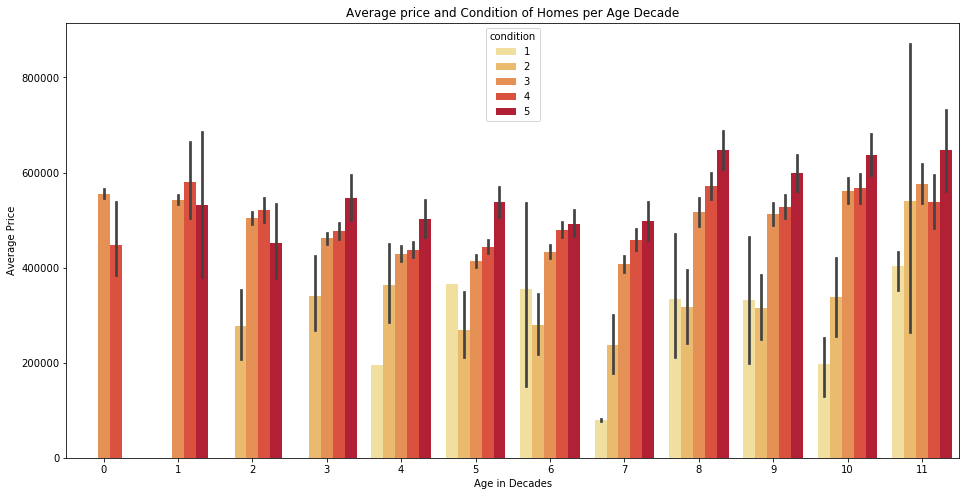

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='age_decade', y='price', hue='condition', data=df, palette="YlOrRd");
plt.title('Average price and Condition of Homes per Age Decade');
plt.xlabel('Age in Decades')
plt.ylabel('Average Price')
plt.show()

This chart allows an easier visual of the lower condtion homes increasing after about 20 years of age, and the homes younger than that having condtion of 3 and 4. While the average number of 'Very Good' homes actually increases as the home age is greater. Lower condition (1 and 2) homes are shown to sell for lower prices compared to 3 or above (an outlier situation is ovserved in the 60 year old home set).

### Grade
    
    1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

    4 = Generally older, low quality construction. Does not meet code.

    5 = Low construction costs and workmanship. Small, simple design.

    6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

    7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

    8 = Just above average in construction and design. Usually better materials. 

    9 = Better architectural design with extra interior and exterior design and quality.

    10 = Homes of this quality generally have high quality features. 

    11 = Custom design and higher quality finish work with added amenities. 

    12 = Custom design and excellent builders. All materials are of the highest quality.

    13 = Generally custom designed and built. Mansion level.

### How does home age relate to grade score?

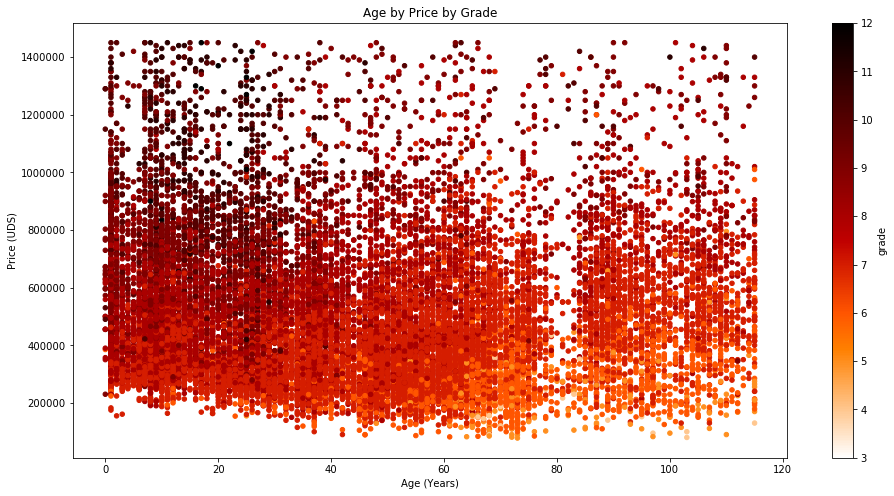

In [7]:
df.plot(kind="scatter", x="age", y="price", figsize=(16, 8), c="grade", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.title('Age by Price by Grade')
plt.ylabel('Price (UDS)')
plt.xlabel('Age (Years)')
plt.show()

Here we can see that newer homes are being being graded higher in ammenities than the average older home. Lower graded homes sell for less. A pattern in the heatmap is visible, home 'grade' seems to have an effect on price worth investigating. Let's plot it in another way:

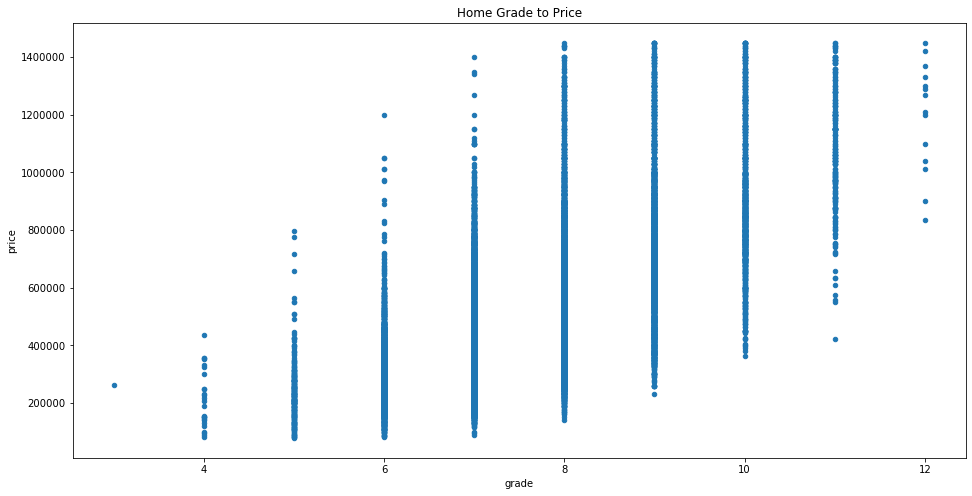

In [6]:
df.plot(kind="scatter", x="grade", y="price", figsize=(16, 8), sharex=False);
plt.title('Ho$me Grade to Price')
plt.show()

A subtle linear trend is observed comparing 'grade' and 'price'. House grade may be a useful feature in our linear model.

### Renovation Effect: how to improve grade and condition?

Since grade shows a relationship to price, can a renovation improve grade, thus price?

Let's examine the effects of a major renovation on improving these scores. 

    0 = No major renovations recorded
    1 = Has had at least one major renovation

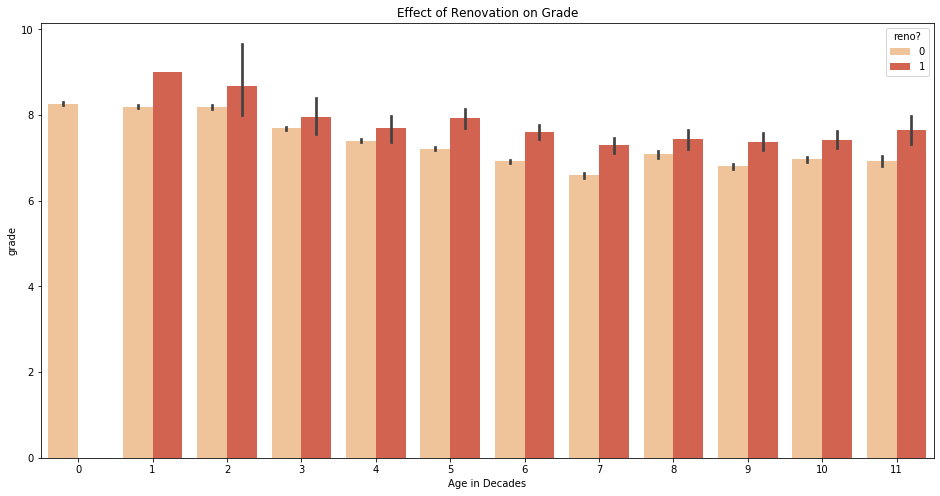

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='age_decade', y='grade', hue='reno?', data=df, palette="OrRd");
plt.title("Effect of Renovation on Grade")
plt.xlabel('Age in Decades')
plt.show()

Homes that have been renovated show a slight increase in grade score across all age categories (except home less than a decade old, where there is no renovation data). Is this increase in grade due to renovation reflected in the selling price? Renovation does slightly improve grade score. Not all improvements are beyond error assumptions. How do these renovations effect price?

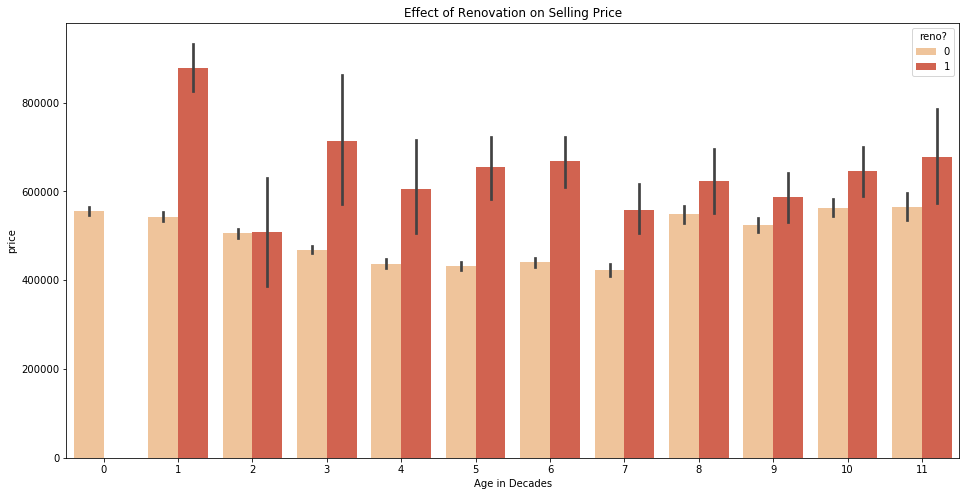

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='age_decade', y='price', hue='reno?', data=df, palette="OrRd");
plt.title("Effect of Renovation on Selling Price")
plt.xlabel('Age in Decades')
plt.show()

Renovated homes typically do sell for higher than non-renovated homes. Let's break this down further and examine the age of the renovations themselves:

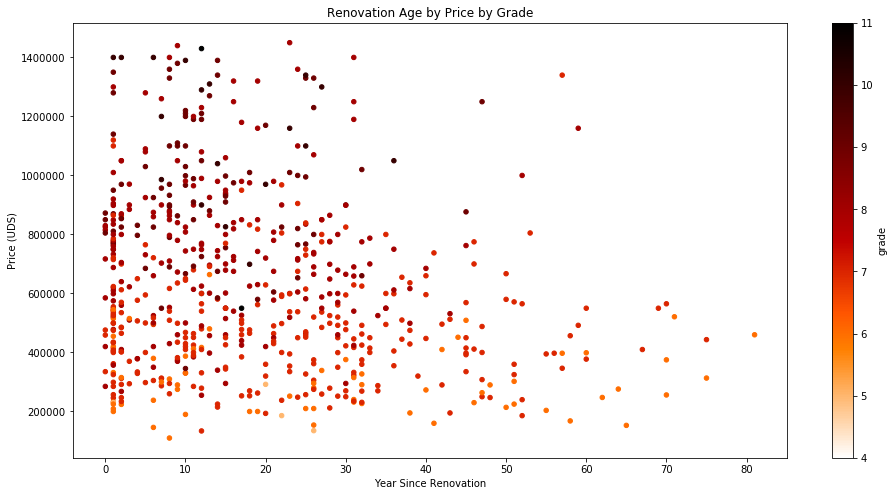

In [19]:
# Plot the ages of the renovations to examine effect on price
# Remove homes that have not been renovated
df.loc[df['reno?'] == 1].plot(kind="scatter", x="reno_age", y="price", figsize=(16, 8), c="grade", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.title('Renovation Age by Price by Grade')
plt.ylabel('Price (UDS)')
plt.xlabel('Year Since Renovation')
plt.show()

Homes with a major renovation within the last 30 years show greater 'grade' ranking and higher selling prices. The darkest colors represent the highest grade and in the top left area we see the most dark spots - this area represents highest sale price and most recent renovation. This is expected. It is likely due to increasing technology and greater access high-end finishes. Also more 'modern' styled homes.

### Conclusion

Renovating a home can potentially increase the selling price compared to similarly graded homes. The home need not be freshly renovated to reap these benefits. It is possible to find homes with less recent renovations that are still highly graded. We conclude it is not necesary to find a freshly renovated home, but a home that has been modernized at least within the last 30 years. A renovation can also be used to significantly inmprove a poorly graded home. There may be opportunity in flipping homes (future work).